In [35]:
from pathlib import Path
import matplotlib as mpl

In [36]:
plot_path = Path('Plots')

In [37]:
def make_fn_eval(case,_type):
    #_x = v_x.split('(')[0]
    #_y = v_y.split('(')[0]
    f = f'evalOA_incYield_{case}_{_type}.png'
    return plot_path /f

In [38]:
plot_path.mkdir(exist_ok=True, parents=True)

## EBAS OA timeseries:

In [39]:
    download_link= 'http://ebas-data.nilu.no/DataSets.aspx?stations=FI0050R&InstrumentTypes=aerosol_mass_spectrometer&fromDate=1970-01-01&toDate=2021-12-31'

## Read in model data. 

In [40]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
import numpy as np

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

## Settings:

In [44]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [45]:
from_t = '2011-01-01'
to_t = '2015-01-01'

## Cases:

In [46]:
cases_sec = ['OsloAero_intBVOC_f19_f19_mg17_incY_full']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19_mg17_incY_full']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

In [47]:
case_mod = cases_sec[0]

In [48]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-01-25 14:09:49,166 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


2022-01-25 14:09:49,166 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


In [49]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','U','V',
       'NCONC01','N50',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 


### Use STP to compare against EBAS data

In [50]:
for case_name in cases_sec:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')
for case_name in cases_orig:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS
UUUPS


In [51]:
dic_ds = dict()
for ca in cases_orig + cases_sec:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-01-25 14:09:49,506 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/N100_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/H2S

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/N100_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_20

2022-01-25 14:09:51,433 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/N100_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/H2S

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/N100_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_20

In [52]:
ds

<xarray.Dataset>
Dimensions:   (time: 35065, station: 24, lev: 32)
Coordinates:
  * time      (time) datetime64[ns] 2011-01-01 ... 2015-01-01
  * station   (station) object 'ASP' 'BIR' 'PAL' 'PLA' ... 'JFJ' 'BEO' 'CMN'
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables: (12/34)
    ACTREL    (station, time) float32 dask.array<chunksize=(24, 35065), meta=np.ndarray>
    BC_A      (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AC     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AI     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AX     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_N      (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    ...        ...
    SS_A1     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A2     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A3     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    T         (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    U         (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    V         (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>

In [53]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [54]:
T =273.15 #K

In [55]:

def get_dic_df_mod(model_lev_i=-1):
    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        ds_sel = ds.sel(station='SMR').isel( lev=model_lev_i)
        rho = pressure*100/(R*T)
    
        ds_sel['rho'] = rho#.load()
        df = ds_sel.to_dataframe()
        ls_so4 = [c for c in df.columns if 'SO4_' in c]#['SO4_NA']

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel[s].attrs['units']!=un:
                ds_sel[s] = ds_sel[s]*ds_sel['rho']*kg2ug
                ds_sel[s].attrs['units']=un

        df = ds_sel.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
    
    
    
    
        df_daily = df#.resample('D').median()

        months = (df_daily.index.month==7 )|(df_daily.index.month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        dic_df[ca] = df_s
        print(ca)
    
        months = (df.index.month==7 )|(df.index.month==8  )

        df_s = df[months]
        df_ym = df_s.resample('Y').median()
        df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_ym
        print(ca)
    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

OsloAero_intBVOC_f19_f19_mg17_incY_full
OsloAero_intBVOC_f19_f19_mg17_incY_full


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


## Open measurement data:

In [56]:
import pandas as pd

import xarray as xr

from bs_fdbck.constants import measurements_path

In [57]:
fn = measurements_path /'Ebas_211201_2307'/'FI0050R.20130101000000.20210215000000.aerosol_mass_spectrometer.organic_mass.pm1_non_refractory.9mo.1h.FI03L_Aerodyne_Q-ACSM_140-104.FI03L_Ng_2011.lev2.nc'
fn2 = measurements_path /'Ebas_211201_2307'/ 'FI0050R.20140101000000.20210215000000.aerosol_mass_spectrometer.organic_mass.pm1_non_refractory.1y.1h.FI03L_Aerodyne_Q-ACSM_140-104.FI03L_Ng_2011.lev2.nc'
fn3 = measurements_path /'Ebas_211201_2307'/'FI0050R.20120328000000.20210224065432.aerosol_mass_spectrometer.organic_mass.pm1_non_refractory.9mo.1h.FI03L_Aerodyne_Q-ACSM_140-104.FI03L_Ng_2011.lev2.nc'
org_hyy = xr.open_mfdataset([fn, fn2, fn3], combine ='by_coords',concat_dim='time')#pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

org_hyy['time'] = pd.to_datetime(org_hyy['time'])

org_hyy['time'] = org_hyy['time'].values + np.timedelta64(1,'h')

Metadata_time puts each file in one coordinate, but averaging over this dimension brings them all on one coordinate. 


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


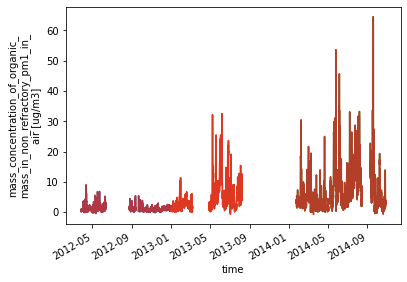

In [58]:
for t in org_hyy['metadata_time']:
    org_hyy['organic_mass_amean'].sel(metadata_time=t).plot()
    
org_hyy.mean('metadata_time')['organic_mass_amean'].plot( alpha=.8)

In [59]:
org_hyy = org_hyy.mean('metadata_time')#.attrs#['time']

Convert to dataframe: 

In [60]:
obs_hyy_s2013 = org_hyy['organic_mass_amean'].sel(time=slice('2012-01-01','2015-01-01')).to_dataframe()
obs_hyy_s2013 = obs_hyy_s2013['organic_mass_amean']


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<AxesSubplot:xlabel='time'>

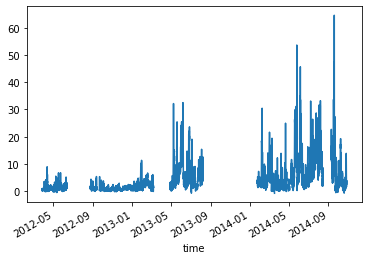

In [61]:
obs_hyy_s2013.plot()

Mask months outside july august

In [62]:
obs_hyy_s2013 = obs_hyy_s2013.mask(((obs_hyy_s2013.index.month!=7) &(obs_hyy_s2013.index.month!=8)))

<AxesSubplot:xlabel='time'>

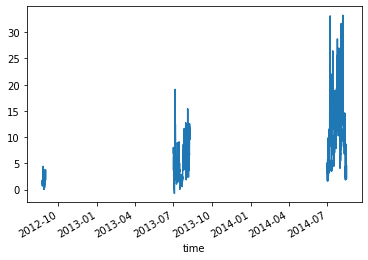

In [63]:
obs_hyy_s2013.plot()

<AxesSubplot:xlabel='time'>

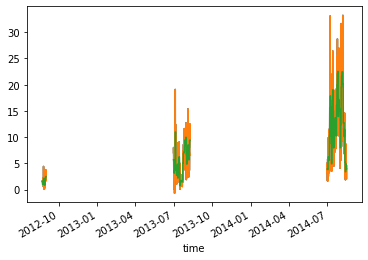

In [64]:
obs_hyy_s2013.plot()
obs_hyy_s2013.resample('h').ffill().plot()

obs_hyy_s2013.resample('D').mean().resample('h').ffill().plot()

Calculate anomaly from daily mean

In [65]:
obs_an = obs_hyy_s2013.resample('h').ffill()-obs_hyy_s2013.resample('D').mean().resample('h').ffill()

obs_an = obs_an[(obs_an.index.month==7) |(obs_an.index.month==8)]

mask= obs_an.notnull()

In [66]:
mask_mo = obs_hyy_s2013.resample('h').ffill()

<AxesSubplot:xlabel='time'>

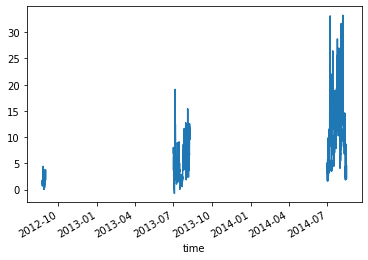

In [67]:
obs_hyy_s2013.plot(label='obs')

## Make dataset for modelled

In [68]:
ds_mod = dic_ds[case_mod]

In [69]:
num_levs = 7

In [70]:
case_mod

'OsloAero_intBVOC_f19_f19_mg17_incY_full'

In [71]:
dic_mod_lev = {}
dic_p = {}
for i in range(1,num_levs):
    
    _dic_df_sm,_dic_df = get_dic_df_mod(model_lev_i=-i)
    _p = float(ds_mod.lev.isel(lev=-i).values)
    print(_p)
    _df = _dic_df[case_mod]
    _df.index = _df.index  + np.timedelta64(1,'h') 
    dic_mod_lev[i] = _df.copy()
    dic_p[i] = _p

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19_mg17_incY_full
OsloAero_intBVOC_f19_f19_mg17_incY_full
992.556095123291


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19_mg17_incY_full
OsloAero_intBVOC_f19_f19_mg17_incY_full
976.325407391414


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19_mg17_incY_full
OsloAero_intBVOC_f19_f19_mg17_incY_full
957.485479535535


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19_mg17_incY_full
OsloAero_intBVOC_f19_f19_mg17_incY_full
936.1983984708786


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19_mg17_incY_full
OsloAero_intBVOC_f19_f19_mg17_incY_full
912.644546944648
OsloAero_intBVOC_f19_f19_mg17_incY_full
OsloAero_intBVOC_f19_f19_mg17_incY_full
887.0202489197254


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:xlabel='time'>

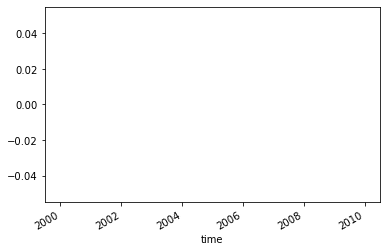

In [72]:
(obs_hyy_s2013-  obs_hyy_s2013.resample('h').mean().loc['2012-07-01 02:00:00':'2014-08-31 23:00:00']).plot(marker='*')

In [73]:
#_df_mod = dic_mod_oa[1].resample('h').mean()
obs_full_per = obs_hyy_s2013.resample('h').mean().loc['2012-07-01 02:00:00':'2014-08-31 23:00:00']
#obs_mask = obs_full_per.notna()

## Extract OA, SOA and POA for model levels and masked by available observations:

In [74]:
dic_mod_oa = dict()
dic_mod_soa = dict()
dic_mod_all = dict()
for i in range(1,num_levs):
    _df = dic_mod_lev[i]
    mod_full_per = _df.resample('h').mean().loc['2012-07-01 02:00:00':'2014-08-31 23:00:00']
    mod_full_per = mod_full_per.mask(obs_full_per.isnull())
    
    
    #_mod_hyy_s2013 = mod_full_per['OA']#.loc['2012-01-01':'2015-01-01']#.plot()
    dic_mod_oa[i] = mod_full_per['OA']

    #_mod_hyy_s2013 = _df['SOA'].loc['2012-01-01':'2015-01-01']#.plot()
    dic_mod_soa[i] = mod_full_per['SOA']

    _mod_hyy_s2013 = _df[varl + ['POA']].loc['2012-01-01':'2015-01-01']#.plot()
    dic_mod_all[i] = mod_full_per[varl + ['POA']]


## Get on same dataset:

In [75]:

mod_full_per = dic_mod_oa[1]


In [76]:
df_full_OA =pd.DataFrame()
df_full_OA['obs'] = obs_full_per
df_full_OA[case_mod] = mod_full_per

In [77]:
df_full_OA

,obs,OsloAero_intBVOC_f19_f19_mg17_incY_full
time,,
2012-07-01 02:00:00,NaN,NaN
2012-07-01 03:00:00,NaN,NaN
2012-07-01 04:00:00,NaN,NaN
2012-07-01 05:00:00,NaN,NaN
2012-07-01 06:00:00,NaN,NaN
...,...,...
2014-08-31 19:00:00,NaN,NaN
2014-08-31 20:00:00,NaN,NaN
2014-08-31 21:00:00,NaN,NaN


<AxesSubplot:xlabel='time'>

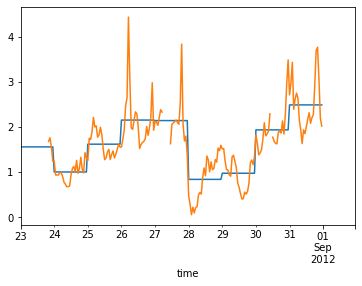

In [78]:
fig, ax = plt.subplots()
df_full_OA['obs'].resample('D').mean().resample('h').ffill().loc['2012-08-23':'2012-09-01'].plot(ax = ax)
#df_full_OA.resample('D').mean().loc['2012-08-20':'2012-09-01'].plot(ax=ax, marker='*')
df_full_OA['obs'].loc['2012-08-23':'2012-09-01'].plot(ax=ax, )



In [79]:
df_daily_mean = df_full_OA.resample('D').mean().resample('h').ffill()

In [80]:
df_anom_OA = df_full_OA - df_daily_mean

In [81]:
def res(x):
    nn = x[0]*df_daily_mean[case_mod] + x[1]*df_anom_OA[case_mod]
    n1 = (nn-df_full_OA['obs'])
    #print(n1)
    return n1[n1.notnull()]

In [82]:
def res_mean(x):
    hour = df_anom_OA[case_mod].index.hour
    anom = df_anom_OA[case_mod].groupby(hour).mean()
    hour = df_daily_mean[case_mod].index.hour
    daily = df_daily_mean[case_mod].groupby(hour).mean()
    nn = x[0]*daily + x[1]*anom
    n1 = (nn-df_full_OA['obs'].groupby(df_full_OA['obs'].index.hour).mean())
    #print(n1)
    return n1[n1.notnull()]

In [83]:
from scipy.optimize import least_squares

In [84]:
x0_rosenbrock = np.array([1, 1])
res_1 = least_squares(res_mean, x0_rosenbrock)
res_1.x

array([1.14461458, 0.72912941])

In [85]:
res_1.cost

1.471244481560716

In [86]:
res_1.optimality

1.6740333341758173e-07

In [87]:
df_daily_mean[case_mod].mean()

7.447027732082488

In [88]:
df_full_OA['obs'].mean()

8.522931350114415

In [89]:
df_daily_mean['obs'].mean()

8.489269089835963

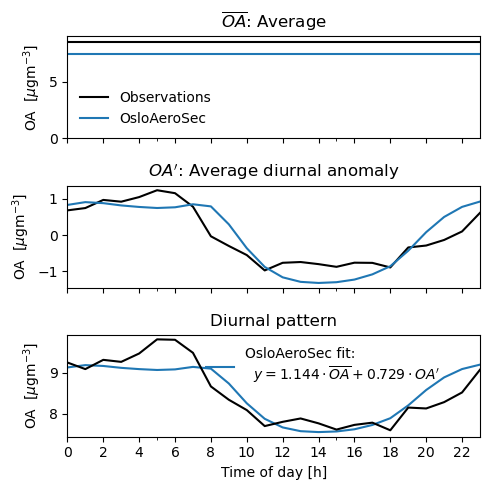

In [91]:
fig, axs = plt.subplots(3,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
pl_obs = df_anom_OA['obs'].groupby(df_anom_OA['obs'].index.hour).mean()
pl_obs.plot(ax=ax,label='Observations', c='k')

df_anom_OA[case_mod].groupby(df_anom_OA[case_mod].index.hour).mean().plot(ax=ax,label='OsloAeroSec',)# c='k')
ax.set_title("$OA'$: Average diurnal anomaly") 
#ax.legend(frameon=False)

ax = axs[0]
hour = df_daily_mean.index.hour
daily_obs = df_daily_mean['obs'].groupby(hour).mean()
daily_obs.plot(ax=ax,label='Observations', c='k')
daily_mod = df_daily_mean[case_mod].groupby(hour).mean()
daily_mod.plot(ax=ax,label='OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("$\overline{OA}$: Average") 
ax.set_ylim([0,9])

ax = axs[2]
hour = df_anom_OA[case_mod].index.hour
anom = df_anom_OA[case_mod].groupby(hour).mean()
hour = df_daily_mean[case_mod].index.hour
daily = df_daily_mean[case_mod].groupby(hour).mean()
nn = 1.144*daily + 0.729*anom
nn.plot(label = "OsloAeroSec fit: \n  $y=1.144 \cdot \overline{OA}+ 0.729 \cdot OA'$       ")
pl_obs = df_full_OA['obs'].groupby(df_full_OA['obs'].index.hour).mean()
pl_obs.plot(ax=ax,label='__nolegend__', c='k')
ax.set_title("Diurnal pattern") 

plt.legend(frameon=False)
ax.set_xlabel('Time of day [h]')
for ax in axs: 
    ax.set_ylabel('OA  [$\mu$gm$^{-3}$]')
plt.tight_layout()

ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,])

ax.set_xlim([0,23])
fn = make_fn_eval(case_mod, 'decomp')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))



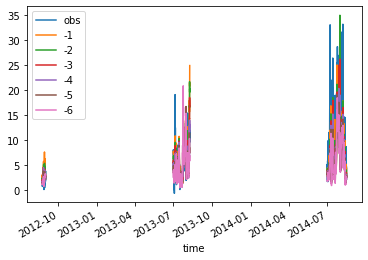

In [92]:
obs_hyy_s2013.plot(label='obs')
for i in range(1,num_levs):
    dic_mod_oa[i].plot(label=f'-{i}')
#mod_hyy_s2013.plot()
#mod_hyy_s2013_2.plot()
plt.legend()

In [93]:
dic_mod_an = dict()
for i in range(1,num_levs):
    _mod_hyy = dic_mod_oa[i]
    daily_mean = _mod_hyy.resample('D').mean().resample('h').ffill()
    _mod_an = _mod_hyy.resample('h').ffill()-daily_mean
    #_mod_an = _mod_an#[obs_an.index]# = obs_an[mask]
    #_mod_an = _mod_an[mask]
    dic_mod_an[i] = _mod_an
    
    #mod_an2 = mod_hyy_s2013_2.resample('h').ffill()-mod_hyy_s2013.resample('D').mean().resample('h').ffill()


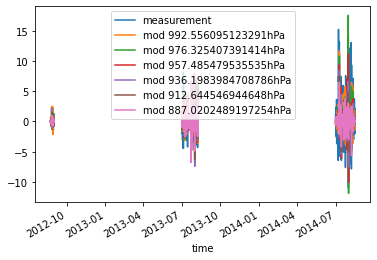

In [94]:
obs_an.plot(label='measurement')
for i in range(1,num_levs):
    _mod_an = dic_mod_an[i] 
    p = dic_p[i]
    _mod_an.plot(label=f'mod {p}hPa')
#mod_an2.plot(label='mod2')

plt.legend()

In [95]:
def make_cbar(fig, label):
    

    levs = [1000]+[np.round(dic_p[i]) for i in range(1,num_levs)] + [850]

    levs_bound = [(levs[i]+levs[i+1])/2 for i in np.arange(len(levs)-1)]

    lev_ticks = levs[1:-1][::-1]

    cmap= mpl.colors.ListedColormap(sns.color_palette('viridis_r',6))
    norm= mpl.colors.BoundaryNorm(levs_bound[::-1], len(levs_bound[::-1]))#, clip=True)

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmap), ticks = lev_ticks, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()



In [96]:
def make_cbar(fig, label):
    
    levs = [992.556095123291,
     976.325407391414,
     957.485479535535,
     936.1983984708786,
     912.644546944648,
     887.0202489197254]

    aa = [levs[0]+(levs[0]-levs[1])/2]
    for i in range(len(levs)-1):
        b = (levs[i] + levs[i+1])/2
        aa.append(b)

    aa.append( levs[-1]+(levs[-1]-levs[-2])/2   )

    a1 = aa[0]
    a2 = aa[-1]
    
    
    cmap = plt.get_cmap('plasma_r')

    norm = mpl.colors.Normalize(vmin=a2,vmax=a1)

    cols = [cmap(norm(min(levs, key=lambda x:abs(x-xx)))) for xx in np.linspace(a2,a1,256)]

    cmm = mpl.colors.ListedColormap(cols)
    

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmm), ticks = levs, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()
    
    return norm, cmm


In [97]:
_mod_an = dic_mod_an[i]
_mod_an.head()

time
2012-07-01 00:00:00   NaN
2012-07-01 01:00:00   NaN
2012-07-01 02:00:00   NaN
2012-07-01 03:00:00   NaN
2012-07-01 04:00:00   NaN
Freq: H, Name: OA, dtype: float64

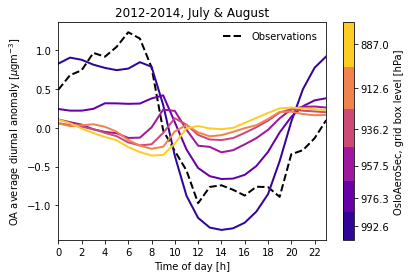

In [98]:
fig, ax  = plt.subplots()
ob_pl = obs_an.groupby(obs_an.index.hour).mean()
ob_pl.plot(label='Observations', color='k', ax=ax,linestyle='dashed', linewidth=2)
#ob_pl = obs_an.groupby(obs_an.index.hour).median()
#ob_pl.plot(label='__nolegend__', color='k', ax=ax, alpha=.3)
norm, cmm = make_cbar(fig, 'OsloAeroSec, grid box level [hPa]')

for i,c in zip(range(1,num_levs),sns.color_palette("viridis", 6)):
    _mod_an = dic_mod_an[i] 
    p = dic_p[i]

    mo_pl = _mod_an.groupby(_mod_an.index.hour).mean()
    lab = '__nolegend__'
    #if i ==num_levs-1:
    #    lab='OsloAero'
    c = cmm(norm(p))
    mo_pl.plot(label=lab, ax=ax, c=c, linewidth=2)
    #mo_pl.plot(label=f'OsloAero, {p:.0f}hPa', ax=ax, c=c)
    #mo_pl.plot(label='__nolegend__', ax=ax, c=c, linewidth=2)
    #mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label='__nolegend__', ax=ax, c=c, alpha=.3)

    #mo_pl2 = mod_an2.groupby(mod_an.index.hour).mean()
#mo_pl2.plot(label=f'OsloAero, {p2:.0f}hPa', ax = ax)

ax.set_xlabel('Time of day [h]')
ax.set_ylabel('OA average diurnal anomaly [$\mu$gm$^{-3}$]')
ax.legend(frameon=False)
ax.set_title('2012-2014, July & August')

#make_cbar(fig, 'OsloAero, grid box level [hPa]')


ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,])

ax.set_xlim([0,23])



fn = make_fn_eval('OsloAeroSec','diurnal_anomaly')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

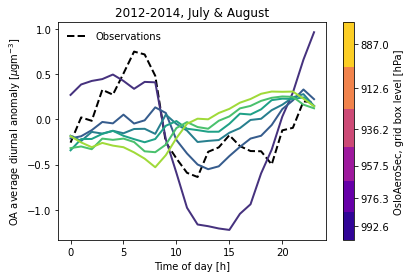

In [99]:
fig, ax  = plt.subplots()
ob_pl = obs_an.groupby(obs_an.index.hour).median()
ob_pl.plot(label='Observations', color='k', ax=ax,linestyle='dashed', linewidth=2)
#ob_pl = obs_an.groupby(obs_an.index.hour).median()
#ob_pl.plot(label='__nolegend__', color='k', ax=ax, alpha=.3)

for i,c in zip(range(1,num_levs),sns.color_palette("viridis", 6)):
    _mod_an = dic_mod_an[i] 
    p = dic_p[i]

    mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label=f'OsloAero, {p:.0f}hPa', ax=ax, c=c)
    lab = '__nolegend__'
    #if i ==num_levs-1:
    #    lab='OsloAero'
    mo_pl.plot(label=lab, ax=ax, c=c, linewidth=2)
    #mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label='__nolegend__', ax=ax, c=c, alpha=.3)

    #mo_pl2 = mod_an2.groupby(mod_an.index.hour).mean()
#mo_pl2.plot(label=f'OsloAero, {p2:.0f}hPa', ax = ax)

ax.set_xlabel('Time of day [h]')
ax.set_ylabel('OA average diurnal anomaly [$\mu$gm$^{-3}$]')
ax.legend(frameon=False)
ax.set_title('2012-2014, July & August')

make_cbar(fig, 'OsloAeroSec, grid box level [hPa]')


fn = make_fn_eval('OsloAeroSec','diurnal_anomaly_median')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## Investigate reduction with height

In [100]:
import matplotlib as mpl

In [101]:
dic_lev2mean = dict()
p_ls = []
mean_ls = []
for i,c in zip(range(1,num_levs),sns.color_palette("viridis", 6)):
    
    _mod_df = dic_mod_oa[i] 
    p = dic_p[i]
    dic_lev2mean[p] = _mod_df.mean()
    p_ls.append(p)
    mean_ls.append(_mod_df.mean())
    

In [102]:
df_OA_mean_lev = pd.DataFrame(mean_ls, index = p_ls, columns=['OA_mean'])
df_OA_mean_lev.index.name = 'pressure'

In [103]:
def res_mean_lev(x):
    exp_sol = x[0]*np.exp(x[1]*df_OA_mean_lev.index)
    res = exp_sol - df_OA_mean_lev['OA_mean'].values
    return res

In [104]:
np.exp(1*df_OA_mean_lev.index)

/tmp/ipykernel_18948/907722605.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1*df_OA_mean_lev.index)


Float64Index([inf, inf, inf, inf, inf, inf], dtype='float64', name='pressure')

In [105]:
df_OA_mean_lev.index

Float64Index([ 992.556095123291,  976.325407391414,  957.485479535535,
              936.1983984708786,  912.644546944648, 887.0202489197254],
             dtype='float64', name='pressure')

In [106]:
exp_sol = 1*np.exp(10e-9*df_OA_mean_lev.index)
exp_sol - df_OA_mean_lev['OA_mean']

pressure
992.556095   -6.480588
976.325407   -5.717788
957.485480   -5.229571
936.198398   -4.863297
912.644547   -4.570868
887.020249   -4.396588
dtype: float64

In [107]:
sol = least_squares(res_mean_lev, np.array([1e-3,1e-3]))

In [108]:
sol.x

array([0.31869019, 0.00313985])

In [109]:
p = df_OA_mean_lev.index
sol_p = sol.x[0]*np.exp(sol.x[1]*p)

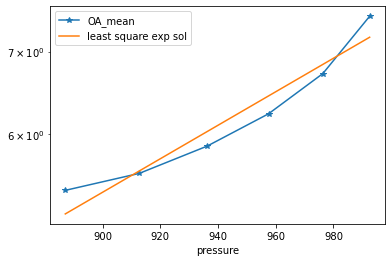

In [110]:
#df_OA_mean_lev = pd.DataFrame(mean_ls, index = p_ls, columns=['OA_mean'])
df_OA_mean_lev.plot(marker='*')
plt.yscale('log')
plt.plot(p, sol_p, label='least square exp sol')
#plt.xscale('log')
plt.legend()

In [111]:
df_OA_mean_lev.index[1:]-df_OA_mean_lev.index[0:-1]

Float64Index([ -16.23068773187697,  -18.83992785587907, -21.287081064656377,
              -23.553851526230574,  -25.62429802492261],
             dtype='float64', name='pressure')

<AxesSubplot:xlabel='time'>

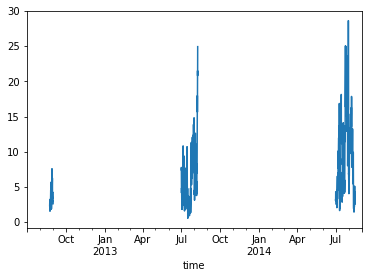

In [112]:
_mod_df = dic_mod_oa[1] 
_mod_df.plot()

In [113]:
_mod_df.mean()

7.480597768498761

In [114]:
_mean_lev1 = dic_mod_oa[1].mean()
_mean_lev2 = dic_mod_oa[2].mean()
_mean_lev1/_mean_lev2

1.1135491241359916

In [115]:
df_daily_mean = df_full_OA.resample('D').mean().resample('h').ffill()

In [116]:
df_full_OA.mean()

obs                                        8.522931
OsloAero_intBVOC_f19_f19_mg17_incY_full    7.480598
dtype: float64

In [117]:
dic_mod_oa[1].mean()

7.480597768498761

In [118]:
dic_mod_oa[1].mean()

7.480597768498761

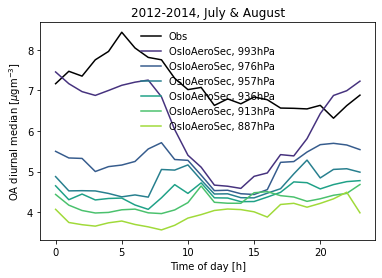

In [119]:
fig, ax  = plt.subplots()
ob_pl = obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).median()
ob_pl.plot(label='Obs', color='k', ax=ax)
#ob_pl = obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).median()
#ob_pl.plot(label='__nolabel__', color='k', ax=ax, alpha=.4,)

for i,c in zip(range(1,num_levs),sns.color_palette("viridis", 6)):
    _mod_an = dic_mod_oa[i]
    p = dic_p[i]

    mo_pl = _mod_an.groupby(_mod_an.index.hour).median()#*3.8
    mo_pl.plot(label=f'OsloAeroSec, {p:.0f}hPa', ax=ax, c=c)
    #mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label='__nolabel__', ax=ax, c=c, alpha=.4)
#mo_pl2 = mod_an2.groupby(mod_an.index.hour).mean()
#mo_pl2.plot(label=f'OsloAero, {p2:.0f}hPa', ax = ax)

ax.set_xlabel('Time of day [h]')
ax.set_ylabel('OA diurnal median [$\mu$gm$^{-3}$]')
ax.legend(frameon=False)
ax.set_title('2012-2014, July & August')
fn = make_fn_eval('OsloAeroSec','diurnal_median')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

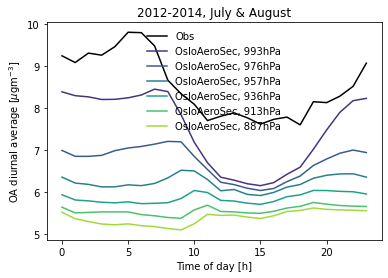

In [120]:
fig, ax  = plt.subplots()
ob_pl = obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).mean()
ob_pl.plot(label='Obs', color='k', ax=ax)
#ob_pl = obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).median()
#ob_pl.plot(label='__nolabel__', color='k', ax=ax, alpha=.4,)

for i,c in zip(range(1,num_levs),sns.color_palette("viridis", 6)):
    _mod_an = dic_mod_oa[i] 
    p = dic_p[i]

    mo_pl = _mod_an.groupby(_mod_an.index.hour).mean()#+(-_mod_an.groupby(_mod_an.index.hour).mean().mean() +obs_hyy_s2013.groupby(obs_hyy_s2013.index.hour).mean().mean())
    mo_pl.plot(label=f'OsloAeroSec, {p:.0f}hPa', ax=ax, c=c)
    #mo_pl = _mod_an.groupby(_mod_an.index.hour).median()
    #mo_pl.plot(label='__nolabel__', ax=ax, c=c, alpha=.4)
#mo_pl2 = mod_an2.groupby(mod_an.index.hour).mean()
#mo_pl2.plot(label=f'OsloAero, {p2:.0f}hPa', ax = ax)

ax.set_xlabel('Time of day [h]')
ax.set_ylabel('OA diurnal average [$\mu$gm$^{-3}$]')
ax.legend(frameon=False)
ax.set_title('2012-2014, July & August')
fn = make_fn_eval('OsloAeroSec','diurnal_mean')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [121]:
mi = np.min(obs_hyy_s2013[obs_hyy_s2013>0])
ma = np.max(obs_hyy_s2013)
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 50)

<AxesSubplot:xlabel='time'>

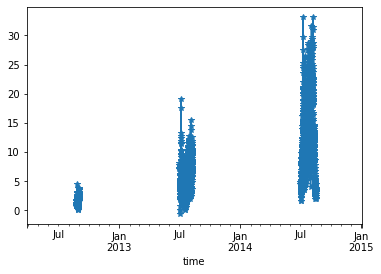

In [122]:
obs_hyy_s2013.resample('h').ffill().plot(marker='*')

In [123]:
_mod_an = dic_mod_oa[1]

a = obs_hyy_s2013.resample('h').ffill( )

_com =pd.merge(a, _mod_an, on='time')#, right=True)

_mod_an_soa = dic_mod_soa[1]
_com =pd.merge(_com, _mod_an_soa, on='time')#, right=True)
_mod_an_soa = dic_mod_all[1]
_com =pd.merge(_com, _mod_an_soa, on='time')#, right=True)


<AxesSubplot:xlabel='time'>

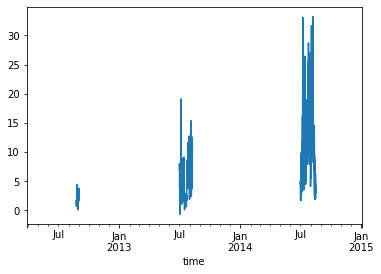

In [124]:
obs_hyy_s2013.resample('h').ffill().plot()

In [125]:
_com['organic_mass_amean']#.plot(marker='*')

time
2012-07-01 02:00:00   NaN
2012-07-01 03:00:00   NaN
2012-07-01 04:00:00   NaN
2012-07-01 05:00:00   NaN
2012-07-01 06:00:00   NaN
                       ..
2014-08-31 19:00:00   NaN
2014-08-31 20:00:00   NaN
2014-08-31 21:00:00   NaN
2014-08-31 22:00:00   NaN
2014-08-31 23:00:00   NaN
Name: organic_mass_amean, Length: 19006, dtype: float64

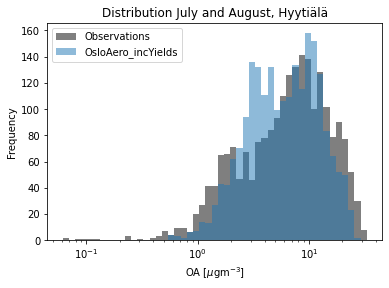

In [158]:
_com['organic_mass_amean'].plot.hist(bins=bins_, alpha=0.5, 
                                     color='k',
                                     label='Observations'
                                    )
plt.xscale('log')
_mod_an = _com['OA'][_com['organic_mass_amean'].notnull()] 
_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero_incYields')
#_mod_an = _com['SOA'][_com['organic_mass_amean'].notnull()] 
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Distribution July and August, Hyytiälä')

plt.legend()
fn = make_fn_eval('OsloAeroSec','hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [127]:
_com['SOA/POA'] = _com['SOA']/_com['POA']

In [128]:
_bins =  10 ** np.linspace(-2, 2, 50)

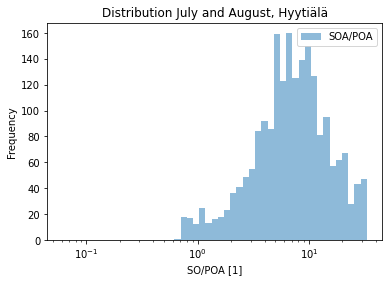

In [129]:
#_com[['SOA','POA']].plot.hist(bins=bins_, alpha=0.5, 
#                                     color='o',
#                                     label='OA'
#                                    )
#
_mod_an = _com['SOA/POA'][_com['organic_mass_amean'].notnull()]#_com['OA'].notnull()] 
_mod_an.plot.hist(bins=bins_, alpha=0.5, stacked=False)
plt.xlabel('SO/POA [1]')
plt.xscale('log')
plt.title('Distribution July and August, Hyytiälä')

plt.legend()
fn = make_fn_eval('OsloAero','SOA2POA_mod')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [130]:
_com['hour'] = _com.index.hour


In [131]:
_com['U']

time
2012-07-01 02:00:00   NaN
2012-07-01 03:00:00   NaN
2012-07-01 04:00:00   NaN
2012-07-01 05:00:00   NaN
2012-07-01 06:00:00   NaN
                       ..
2014-08-31 19:00:00   NaN
2014-08-31 20:00:00   NaN
2014-08-31 21:00:00   NaN
2014-08-31 22:00:00   NaN
2014-08-31 23:00:00   NaN
Name: U, Length: 19006, dtype: float32

In [132]:
import numpy as np

In [133]:
_com['dir'] = (180+180/np.pi*np.arctan2(_com['V'], _com['U']))%360

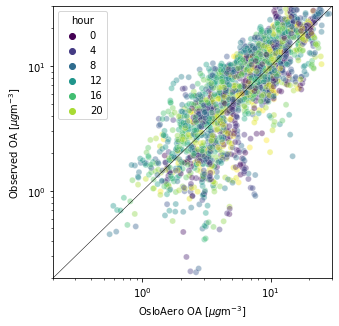

In [134]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='OA', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='hour', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])

ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')



lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

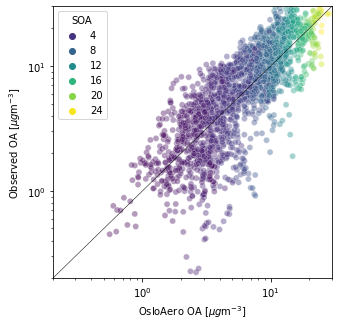

In [173]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='OA', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='SOA', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])

ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')



lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

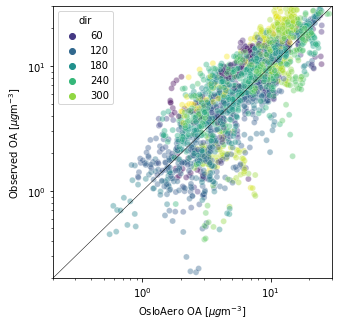

In [135]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='OA', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='dir', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])

ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')



lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [136]:
_com.columns

Index(['organic_mass_amean', 'OA', 'SOA', 'N100', 'DOD500', 'DOD440', 'ACTREL',
       'H2SO4', 'SOA_LV', 'COAGNUCL', 'FORMRATE', 'T', 'U', 'V', 'NCONC01',
       'N50', 'SOA_NA', 'SOA_A1', 'OM_NI', 'OM_AI', 'OM_AC', 'SO4_NA',
       'SO4_A1', 'SO4_A2', 'SO4_AC', 'SO4_PR', 'BC_N', 'BC_AX', 'BC_NI',
       'BC_A', 'BC_AI', 'BC_AC', 'SS_A1', 'SS_A2', 'SS_A3', 'DST_A2', 'DST_A3',
       'POA', 'SOA/POA', 'hour', 'dir'],
      dtype='object')

In [137]:
_com['OA']#-_com['organic_mass_amean']

time
2012-07-01 02:00:00   NaN
2012-07-01 03:00:00   NaN
2012-07-01 04:00:00   NaN
2012-07-01 05:00:00   NaN
2012-07-01 06:00:00   NaN
                       ..
2014-08-31 19:00:00   NaN
2014-08-31 20:00:00   NaN
2014-08-31 21:00:00   NaN
2014-08-31 22:00:00   NaN
2014-08-31 23:00:00   NaN
Name: OA, Length: 19006, dtype: float64

<AxesSubplot:xlabel='time'>

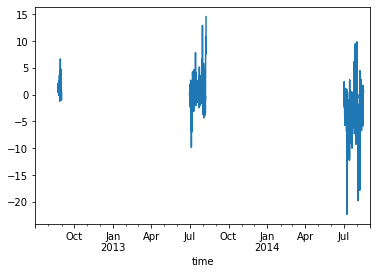

In [138]:
(_com['OA']-_com['organic_mass_amean']).plot()

In [139]:
_com.columns

Index(['organic_mass_amean', 'OA', 'SOA', 'N100', 'DOD500', 'DOD440', 'ACTREL',
       'H2SO4', 'SOA_LV', 'COAGNUCL', 'FORMRATE', 'T', 'U', 'V', 'NCONC01',
       'N50', 'SOA_NA', 'SOA_A1', 'OM_NI', 'OM_AI', 'OM_AC', 'SO4_NA',
       'SO4_A1', 'SO4_A2', 'SO4_AC', 'SO4_PR', 'BC_N', 'BC_AX', 'BC_NI',
       'BC_A', 'BC_AI', 'BC_AC', 'SS_A1', 'SS_A2', 'SS_A3', 'DST_A2', 'DST_A3',
       'POA', 'SOA/POA', 'hour', 'dir'],
      dtype='object')

In [140]:
_com['wind_speed'] = np.sqrt(_com['U']**2 + _com['V']**2)

_com['wind_speed_c'] =pd.qcut(_com['wind_speed'], q=[0,0.16,.33,0.5, 0.66, .84])
_com['SOA/POA_c'] =pd.qcut(_com['SOA/POA'], q=[0,0.16,.33,0.5, 0.66, .84])

In [141]:
_mod_an = (_com['OA']-_com['organic_mass_amean'])
_com['diff_OA'] = (_com['OA']-_com['organic_mass_amean'])
_com['diff_OA_c'] =pd.qcut(_com['diff_OA'], q=[0,0.16,.33,0.5, 0.66, .84])

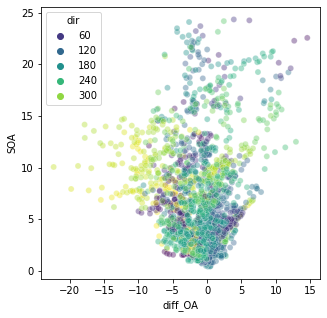

In [142]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='diff_OA', y='SOA',#orbins=bins_, alpha=0.5, 
                                     hue='dir', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                facecolor=None,
                #edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim([0.2,30])
#ax.set_ylim([0.2,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')



lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

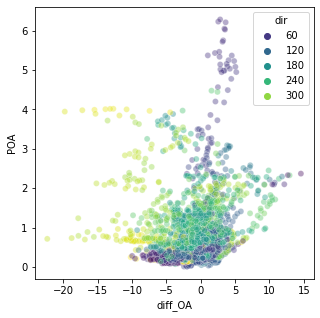

In [143]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='diff_OA', y='POA',#orbins=bins_, alpha=0.5, 
                                     hue='dir', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim([0.2,30])
#ax.set_ylim([0.2,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')



lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

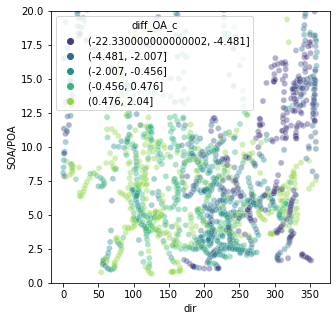

In [144]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='dir', y='SOA/POA',#orbins=bins_, alpha=0.5, 
                                     hue='diff_OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim([0.2,30])
#ax.set_ylim([0.2,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

ax.set_ylim([0,20])

lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

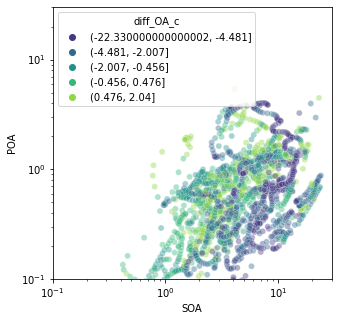

In [145]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='SOA', y='POA',#orbins=bins_, alpha=0.5, 
                                     hue='diff_OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.1,30])
ax.set_ylim([0.1,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

#ax.set_ylim([0,20])

lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

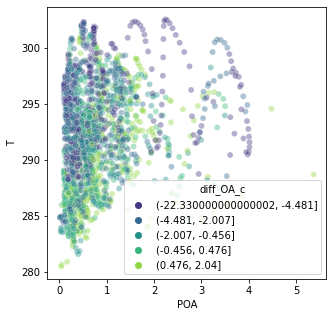

In [146]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='POA', y='T',#orbins=bins_, alpha=0.5, 
                                     hue='diff_OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim([0.1,30])
#ax.set_ylim([0.1,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

#ax.set_ylim([0,20])

lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

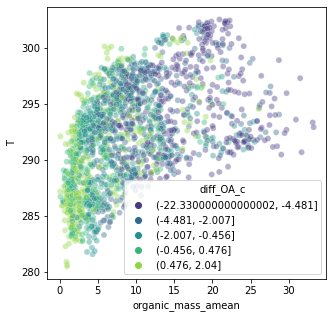

In [147]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='organic_mass_amean', y='T',#orbins=bins_, alpha=0.5, 
                                     hue='diff_OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim([0.1,30])
#ax.set_ylim([0.1,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

#ax.set_ylim([0,20])

lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

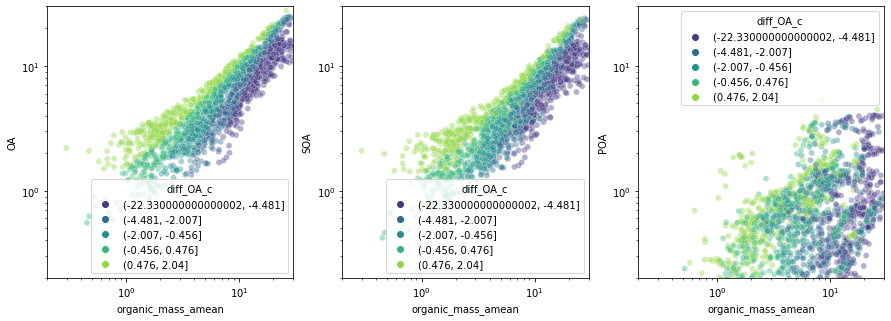

In [148]:
fi, axs = plt.subplots(1,3,figsize=[15,5],)
ax = axs[0]
sns.scatterplot(x='organic_mass_amean', y='OA',#orbins=bins_, alpha=0.5, 
                                     hue='diff_OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])
ax = axs[1]
sns.scatterplot(x='organic_mass_amean', y='SOA',#orbins=bins_, alpha=0.5, 
                                     hue='diff_OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])

ax = axs[2]
sns.scatterplot(x='organic_mass_amean', y='POA',#orbins=bins_, alpha=0.5, 
                                     hue='diff_OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])


#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

#ax.set_ylim([0,20])

lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

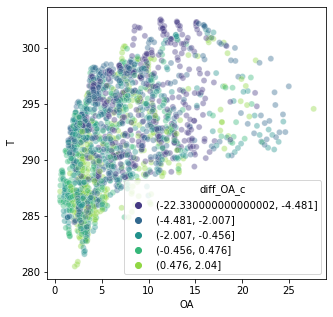

In [149]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='OA', y='T',#orbins=bins_, alpha=0.5, 
                                     hue='diff_OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim([0.1,30])
#ax.set_ylim([0.1,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

#ax.set_ylim([0,20])

lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

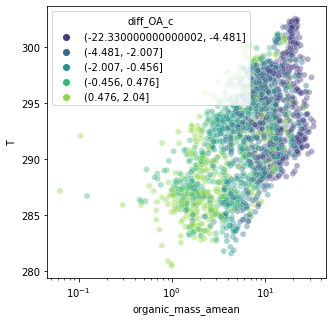

In [150]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='organic_mass_amean', y='T',#orbins=bins_, alpha=0.5, 
                                     hue='diff_OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim([0.1,30])
#ax.set_ylim([0.1,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

#ax.set_ylim([0,20])

lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

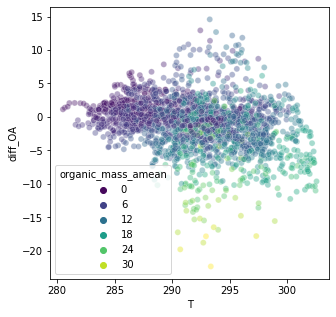

In [151]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='T', y='diff_OA',#orbins=bins_, alpha=0.5, 
                                     hue='organic_mass_amean', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim([0.1,30])
#ax.set_ylim([0.1,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

#ax.set_ylim([0,20])

lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

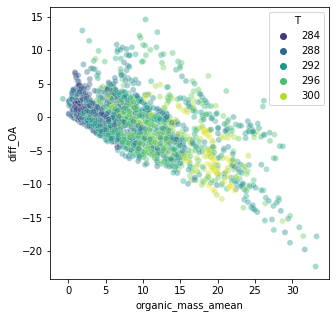

In [152]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='organic_mass_amean', y='diff_OA',#orbins=bins_, alpha=0.5, 
                                     hue='T', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)#[_com['dir']<180])
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim([0.1,30])
#ax.set_ylim([0.1,30])

#ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
#ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

#ax.set_ylim([0,20])

lims = ax.get_xlim()
#ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No real dependency on temperature? Really just a factor change fixes everything. 

In [159]:
_com['organic_mass_amean_div3'] = _com['organic_mass_amean']/3

In [160]:
_com['OA_ad'] = _com['POA']+_com['SOA']*3.4
_com['OA_adPOA'] = _com['POA']*10+_com['SOA']

In [161]:
_com['OA_x3'] = _com['OA']*2.9

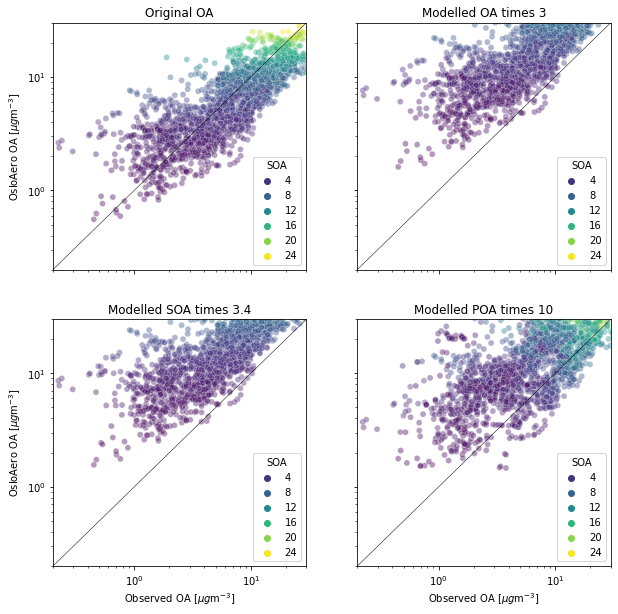

In [162]:
hue = 'SOA'

fi, axs = plt.subplots(2,2, figsize=[10,10],sharey=True, sharex=True)
axs = axs.flatten()
ax = axs[1]
sns.scatterplot(y='OA_x3', x='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue=hue, 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim([0.2,10])
#ax.set_ylim([0.2,10])
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])


ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')



lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
ax.set_title('Modelled OA times 3')


ax = axs[2]
sns.scatterplot(y='OA_ad', x='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue=hue, 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])

ax.set_ylabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_xlabel('Observed OA [$\mu g$m$^{-3}$]')

ax.set_title('Modelled SOA times 3.4')


lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)

ax = axs[3]
sns.scatterplot(y='OA_adPOA', x='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue=hue, 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])

ax.set_ylabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_xlabel('Observed OA [$\mu g$m$^{-3}$]')

ax.set_title('Modelled POA times 10')


lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)



ax = axs[0]
sns.scatterplot(y='OA', x='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue=hue, 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])

ax.set_ylabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_xlabel('Observed OA [$\mu g$m$^{-3}$]')

ax.set_title('Original OA')


lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

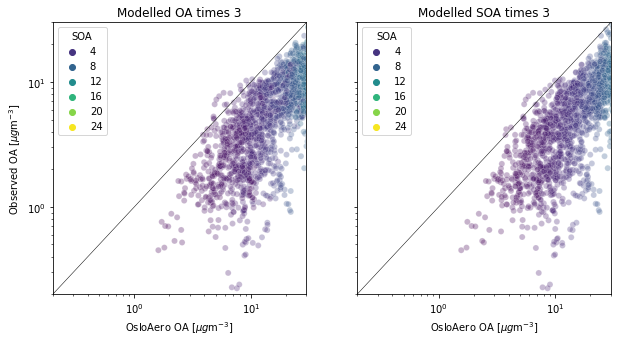

In [163]:
fi, axs = plt.subplots(1,2, figsize=[10,5],sharey=True, sharex=True)
ax = axs[0]
sns.scatterplot(x='OA_x3', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='SOA', 
                #col = 'dir',
                ax=ax,
                alpha=0.3,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim([0.2,10])
#ax.set_ylim([0.2,10])
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])


ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')



lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
ax.set_title('Modelled OA times 3')


ax = axs[1]
sns.scatterplot(x='OA_ad', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='SOA', 
                #col = 'dir',
                ax=ax,
                alpha=0.3,
                palette='viridis',
                
                edgecolors=None,
                data = _com)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.2,30])
ax.set_ylim([0.2,30])

ax.set_xlabel('OsloAero OA [$\mu g$m$^{-3}$]')
ax.set_ylabel('Observed OA [$\mu g$m$^{-3}$]')

ax.set_title('Modelled SOA times 3')


lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
fn = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## Daily median:

In [164]:
com_daily = _com.resample('D').median()

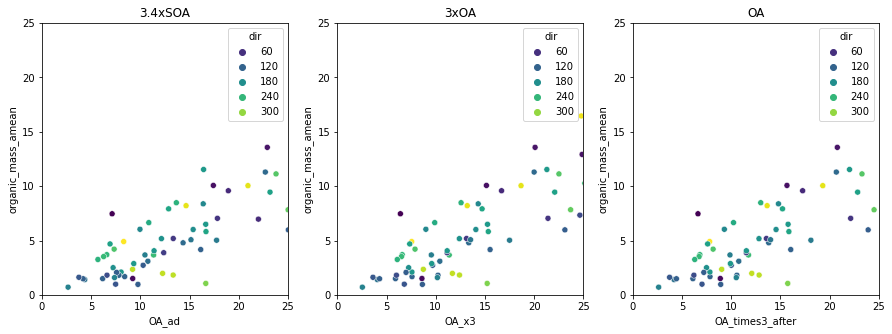

In [165]:
fi, axs = plt.subplots(1,3,figsize=[15,5])
ax = axs[0]
ax
sns.scatterplot(x='OA_ad', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='dir', 
                #ax=ax,
                #alpha=0.4,
                palette = 'viridis',
                edgecolors=None,
                ax=ax,
                data = com_daily)


ax.set_xlim([0,25])

ax.set_ylim([0,25])
ax.set_title('3.4xSOA')

ax = axs[1]
ax
sns.scatterplot(x='OA_x3', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='dir', 
                #ax=ax,
                #alpha=0.4,
                palette = 'viridis',
                edgecolors=None,
                ax=ax,
                data = com_daily)

ax.set_xlim([0,25])

ax.set_ylim([0,25])
ax.set_title('3xOA')

ax = axs[2]


com_daily['OA_times3_after'] = com_daily['OA']*3.

sns.scatterplot(x='OA_times3_after', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='dir', 
                #ax=ax,
                #alpha=0.4,
                palette = 'viridis',
                edgecolors=None,
                data = com_daily)

ax.set_xlim([0,25])

ax.set_ylim([0,25])
ax.set_title('OA')
plt.show()

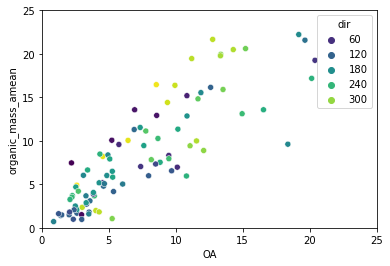

In [166]:
sns.scatterplot(x='OA', y='organic_mass_amean',#orbins=bins_, alpha=0.5, 
                                     hue='dir', 
                #ax=ax,
                #alpha=0.4,
                palette = 'viridis',
                edgecolors=None,
                data = com_daily)

plt.xlim([0,25])

plt.ylim([0,25])
plt.show()

looks reasonable. 


In [167]:
_mod_an = (_com['OA']-_com['organic_mass_amean'])
mi = np.min(np.abs(_mod_an))
ma = np.max(np.abs(_mod_an))
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 25)

bins_ = np.concatenate([-bins_[::-1], bins_])
bins_.shape

(50,)

In [168]:
bins_

array([-2.23290398e+01, -1.49834388e+01, -1.00543257e+01, -6.74674659e+00,
       -4.52726430e+00, -3.03792676e+00, -2.03853771e+00, -1.36791843e+00,
       -9.17913274e-01, -6.15946655e-01, -4.13318221e-01, -2.77348615e-01,
       -1.86109033e-01, -1.24884604e-01, -8.38012222e-02, -5.62330712e-02,
       -3.77340355e-02, -2.53206415e-02, -1.69908910e-02, -1.14013848e-02,
       -7.65066270e-03, -5.13381844e-03, -3.44494233e-03, -2.31165706e-03,
       -1.55118950e-03,  1.55118950e-03,  2.31165706e-03,  3.44494233e-03,
        5.13381844e-03,  7.65066270e-03,  1.14013848e-02,  1.69908910e-02,
        2.53206415e-02,  3.77340355e-02,  5.62330712e-02,  8.38012222e-02,
        1.24884604e-01,  1.86109033e-01,  2.77348615e-01,  4.13318221e-01,
        6.15946655e-01,  9.17913274e-01,  1.36791843e+00,  2.03853771e+00,
        3.03792676e+00,  4.52726430e+00,  6.74674659e+00,  1.00543257e+01,
        1.49834388e+01,  2.23290398e+01])

In [169]:
_com

,organic_mass_amean,OA,SOA,N100,DOD500,DOD440,ACTREL,H2SO4,SOA_LV,COAGNUCL,...,dir,wind_speed,wind_speed_c,SOA/POA_c,diff_OA,diff_OA_c,organic_mass_amean_div3,OA_ad,OA_adPOA,OA_x3
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


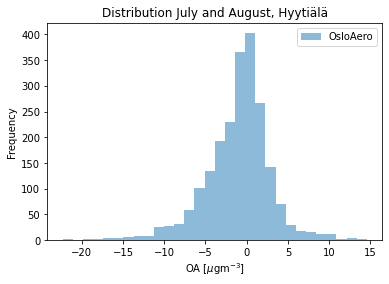

In [170]:
#_com['organic_mass_amean'].plot.hist(bins=bins_, alpha=0.5, 
#                                     color='k',
#                                     label='Observations'
#                                    )
#plt.xscale('log')
_mod_an = (_com['OA']-_com['organic_mass_amean'])#[_com['organic_mass_amean'].notnull()] 
_mod_an.plot.hist( alpha=0.5,label='OsloAero', bins=30)
plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Distribution July and August, Hyytiälä')

plt.legend()


In [171]:
_com#['OA']

,organic_mass_amean,OA,SOA,N100,DOD500,DOD440,ACTREL,H2SO4,SOA_LV,COAGNUCL,...,dir,wind_speed,wind_speed_c,SOA/POA_c,diff_OA,diff_OA_c,organic_mass_amean_div3,OA_ad,OA_adPOA,OA_x3
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
_com['OA']

time
2012-07-01 02:00:00   NaN
2012-07-01 03:00:00   NaN
2012-07-01 04:00:00   NaN
2012-07-01 05:00:00   NaN
2012-07-01 06:00:00   NaN
                       ..
2014-08-31 19:00:00   NaN
2014-08-31 20:00:00   NaN
2014-08-31 21:00:00   NaN
2014-08-31 22:00:00   NaN
2014-08-31 23:00:00   NaN
Name: OA, Length: 19006, dtype: float64